# broken_streaks

Here we characterize how stocks respond on the first good day of weather after a bad streak, and the first bad day of weather after a good streak. The results will go into our 

In [86]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [87]:
basedir = '/Users/bono/demo_projects/weather_stocks/'
# file = basedir+'data/df_clean.pkl'
file = basedir+'data/df_all.pkl'
infile = open(file,'rb')
df_all = pickle.load(infile)
infile.close()

## Remove Outliers From Stock Data

In [88]:
import sys
sys.path.append(basedir+"src") # go to parent dir
from motion_characterizer import remove_stock_outliers as rso

In [89]:
df_clean = rso(df_all,nsigma=3)

### Show the daily motion before and after outlier removal
lump the motions for all time into a histogram:

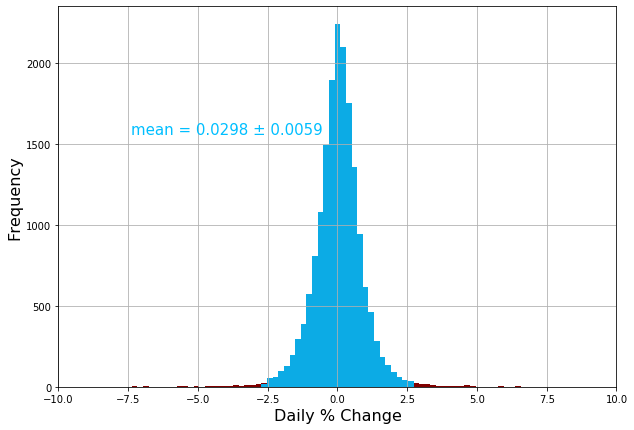

In [90]:
#setup the plot
plt.figure(figsize=(10, 7))
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Daily % Change',fontsize=16)
plt.xlim(-10,10)
plt.grid(True)

#histogram the full dataset
bins = np.linspace(-10, 10, 100)
x = df_all['PercentChange']
n, bins, patches = plt.hist(x,bins,facecolor='maroon')

#histogram the clean dataset
bins = np.linspace(-10, 10, 100)
x = df_clean['PercentChange']
n, bins, patches = plt.hist(x,bins,facecolor='deepskyblue',alpha=0.9)

#display the mean and error on mean for the clean distribution
mean = round(df_clean['PercentChange'].mean(),4)
emean = round(df_clean['PercentChange'].sem(),4)
t = plt.text(-7.4, 1560, f'mean = {mean} ± {emean}', fontsize=15, color="deepskyblue")

display the motion for each day individually:

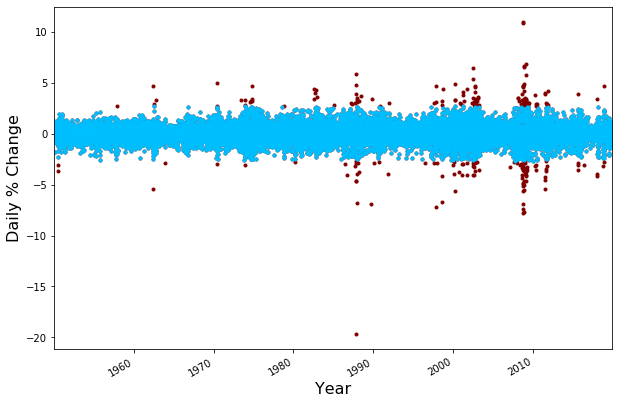

In [91]:
plt.figure(figsize=(10, 7))
plt.ylabel('Daily % Change',fontsize=16)
df_all['PercentChange'].plot(color="maroon",style='.')
df_clean['PercentChange'].plot(color="deepskyblue",style='.')
x = plt.xlabel('Year',fontsize=16)

## Look at days where good or bad weather streaks end
First seperate those days into new dataframes

In [92]:
from motion_characterizer import split_types as st
df_clean_good,df_clean_bad = st(df_clean)

histogram and characterize the stock motions for both kinds of days

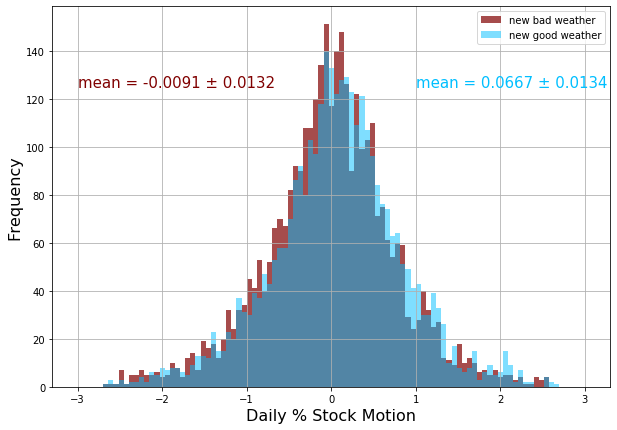

In [93]:
#clean up the notation
x_bad = df_clean_bad['PercentChange']
x_good = df_clean_good['PercentChange']
#calculate the mean and its error
mb = round(x_bad.mean(),4)
emb = round(x_bad.sem(),4)
mg = round(x_good.mean(),4)
emg = round(x_good.sem(),4)
#setup the plots
plt.figure(figsize=(10, 7))
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Daily % Stock Motion',fontsize=16)
plt.grid(True)
plt.text(-3, 125, f'mean = {mb} ± {emb}', fontsize=15, color="maroon")
plt.text(1, 125, f'mean = {mg} ± {emg}', fontsize=15, color="deepskyblue")
#produce the histogram
bins = np.linspace(-3, 3, 100)
n, bins, patches = plt.hist(x_bad,bins,facecolor='maroon',alpha=0.7,label='new bad weather')
n, bins, patches = plt.hist(x_good,bins,facecolor='deepskyblue',alpha=0.5,label='new good weather')
leg = plt.legend()

## How robust is the difference?
Test this by:
* Seeing if it persists thoughout the year (montly seperation)
* Seeing if it persists thoughout different decades

### Define a function to average over slices in various time-based arrangments of the data

In [94]:
def time_averager(df,time="month"):    
    if(time=="month"):
        group_type = df.index.month
    elif(time=="year"):
        group_type = df.index.year
    elif(time=="decade"):
        group_type = (df.index.year//10)*10     
    g = df.groupby(group_type)
    var = df['PercentChange']
    y = var.groupby(group_type).mean().values
    ey = var.groupby(group_type).sem().values
    x = np.fromiter(g.groups.keys(),dtype=float)
    return x,y,ey

### Plot the results from the time averager for the different types of days

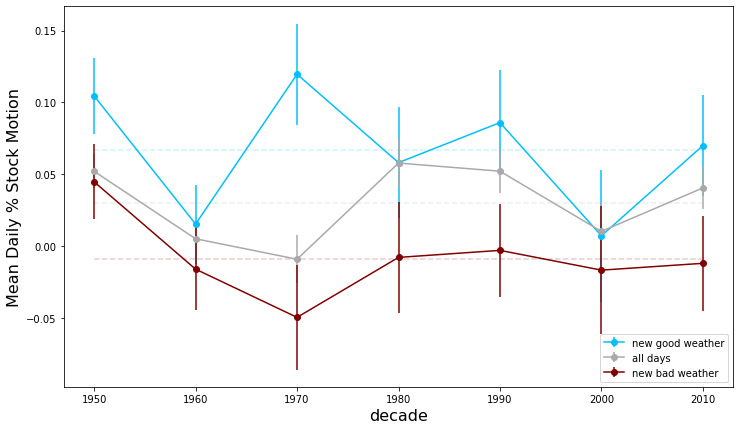

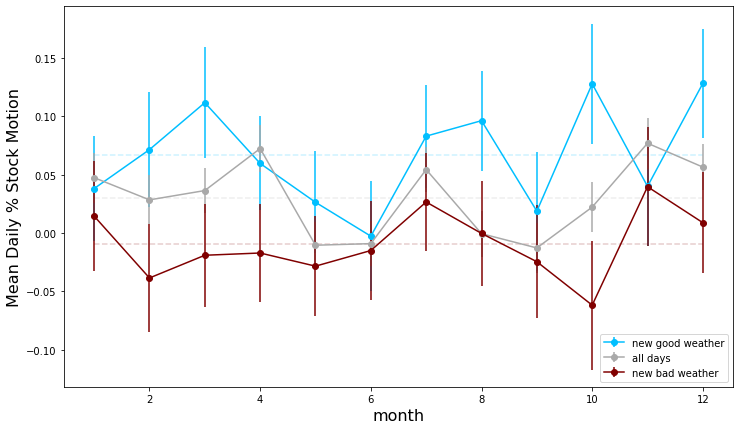

In [95]:
scales=['decade','month']
for scale in scales:
    plt.figure(figsize=(12, 7))

    plt.ylabel('Mean Daily % Stock Motion',fontsize=16)
    plt.xlabel(scale,fontsize=16)

    #good days
    x,y,ey = time_averager(df_clean_good,time=scale)
    plt.errorbar(x, y, yerr=ey, label='new good weather',c='deepskyblue',fmt='o-')
    plt.hlines(mg,x[0],x[-1], colors='deepskyblue', linestyles='--',alpha=0.2)
    
    
    #all days
    x,y,ey = time_averager(df_clean,time=scale)
    plt.errorbar(x, y, yerr=ey, label='all days',c='darkgrey',fmt='o-')
    plt.hlines(mean,x[0],x[-1], colors='darkgrey', linestyles='--',alpha=0.2)

    #bad days
    x,y,ey = time_averager(df_clean_bad,time=scale)
    plt.errorbar(x, y, yerr=ey,label='new bad weather',c='maroon',fmt='o-')
    plt.hlines(mb,x[0],x[-1], colors='maroon', linestyles='--',alpha=0.2)

    l = plt.legend(loc='lower right')

# Profit calculator

In [97]:
bad_day_frac = 0.5
spread = 0.0758/100.0
maxyears = 20
years  = np.arange(maxyears)
profits = np.zeros(maxyears)
profits2 = np.zeros(maxyears)

for y in years:
    profits[y] = investment_simulator(y)

1
1
1
1
1
0.5521452253220381
-0.4821248225158496
-0.4821248225158496
-0.4821248225158496
-0.4821248225158496
-0.6037532466670014
-0.6037532466670014
-0.6037532466670014
-0.6037532466670014
-0.6037532466670014
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.3661314359791614
0.4483497283247309
0.10601590799924335
-0.06055886021533575
-0.06055886021533575
-0.06055886021533575
-0.06055886021533575
-0.06055886021533575
-0.06055886021533575
-0.06055886021533575
-0.025427907347507488
-0.025427907347507488
-0.025427907347507488
-0.025427907347507488
-0.04125711516947677
-0.04125711516947677
-0.04125711516947677
-0.04125711516947677
-0.04125711516947677
-0.04125711516947677
-0.0178029336608714
0.0056153451850176565
0.00600

-0.1731739135684661
-0.10615616554645924
-0.09675878887056251
-0.09675878887056251
-0.09675878887056251
-0.09675878887056251
-0.10478966324124143
-0.10478966324124143
-0.10478966324124143
-0.10478966324124143
-0.10478966324124143
-0.10478966324124143
-0.10478966324124143
-0.10478966324124143
-0.10478966324124143
-0.10478966324124143
-0.14570205283303933
-0.030374141416607565
-0.016576415853678247
-0.015343724530153438
-0.025611458779779397
-0.025611458779779397
-0.025611458779779397
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.006094362497816574
-0.012385126585420144
-0.031242340617700544
-0.031242340617700544
-0.031242340617700544
-0.024730574661637805
-0.024730574661637805
-0.024730574661637805
-0.028087715852684624
-0.04250912705666397
-0.04250912705666397
-0.04250

1
1
1
1
1
0.9910897579692592
-0.5574257184086518
-0.5574257184086518
-0.5574257184086518
-0.5574257184086518
0.18062480474828768
0.18062480474828768
0.18062480474828768
0.18062480474828768
0.18062480474828768
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.23759965619790202
0.4702932492514195
0.5874047157965038
1.0272529165823319
1.0272529165823319
1.0272529165823319
1.0272529165823319
1.0272529165823319
1.0272529165823319
1.0272529165823319
1.7212656044604118
1.7212656044604118
1.7212656044604118
1.7212656044604118
2.339743862967838
2.339743862967838
2.339743862967838
2.339743862967838
2.339743862967838
2.339743862967838
1.0583006964251314
1.9421203858805778
4.530123848447584
4.530123848447584
4.

-0.9563095405142928
-0.9304807809878846
-0.8481108277815503
-0.8481108277815503
-0.8481108277815503
-0.8481108277815503
-0.8481108277815503
-0.8481108277815503
-0.8481108277815503
-0.8275262751734649
-0.8275262751734649
-0.8275262751734649
-0.8275262751734649
-1.5383699457063669
-1.5383699457063669
-1.5383699457063669
-1.5383699457063669
-1.5383699457063669
-1.5383699457063669
-2.0722942829871083
-0.7669263633807375
-0.4429445914912439
-0.4429445914912439
-0.4429445914912439
-0.4429445914912439
-0.4429445914912439
-0.4429445914912439
-0.4429445914912439
-0.4429445914912439
-0.6197102692321597
-0.6197102692321597
-0.6197102692321597
-0.6197102692321597
-0.6197102692321597
-0.6197102692321597
-0.8109811932173716
0.3953283380691813
0.6757910399629485
0.6757910399629485
0.6757910399629485
0.6757910399629485
0.3704198410589993
0.3704198410589993
0.3704198410589993
0.6173959211910047
0.6232939197534706
0.6232939197534706
0.6232939197534706
0.34573189671335286
0.34573189671335286
0.3457318967

3.3815006381667035e-17
3.3815006381667035e-17
3.3815006381667035e-17
5.420171010564256e-17
5.984350281935876e-17
6.70378598431441e-17
1.318550081947096e-16
1.6779108071371546e-16
2.319873295345671e-16
2.319873295345671e-16
2.319873295345671e-16
3.765456957855282e-17
3.765456957855282e-17
3.765456957855282e-17
3.765456957855282e-17
3.765456957855282e-17
-1.470427549579785e-17
-5.1554648277659495e-18
-5.1554648277659495e-18
-5.1554648277659495e-18
-5.1554648277659495e-18
-5.1554648277659495e-18
-5.1554648277659495e-18
-4.991837103389806e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-7.79248460801557e-18
-8.78290668768963e-18
-7.345385334239154e-18
-1.390880468623367e-17
-2.1084956211679288e-17
-2.1084956211679288e-17
-2.1084956211679288e-17
-2.1084

4.78849140831724e-19
5.703771209839874e-19
5.703771209839874e-19
5.703771209839874e-19
5.703771209839874e-19
3.7383429268698505e-19
3.7383429268698505e-19
3.7383429268698505e-19
1.6064027694064678e-19
7.714186695461449e-20
7.714186695461449e-20
7.714186695461449e-20
7.714186695461449e-20
3.913540858590227e-20
3.913540858590227e-20
3.913540858590227e-20
3.913540858590227e-20
2.8418416205635505e-20
2.8418416205635505e-20
2.8418416205635505e-20
2.8418416205635505e-20
4.561514924431469e-21
3.0621442268538272e-21
3.0621442268538272e-21
3.0621442268538272e-21
2.914900082775703e-21
2.914900082775703e-21
2.914900082775703e-21
4.694733367399498e-23
4.694733367399498e-23
4.694733367399498e-23
4.694733367399498e-23
4.694733367399498e-23
5.79288930903327e-23
5.79288930903327e-23
5.79288930903327e-23
5.79288930903327e-23
5.79288930903327e-23
5.79288930903327e-23
5.79288930903327e-23
7.459244513219461e-23
4.54616052259921e-23
1.1453772547818357e-22
1.1453772547818357e-22
1.1453772547818357e-22
1.145

0.975847141911929
0.5406114350895384
0.5406114350895384
0.5406114350895384
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.13266422132731534
0.3974177959783456
0.2318094016723935
0.2318094016723935
0.2318094016723935
0.3971735180297771
0.3971735180297771
0.3971735180297771
0.15379638000185591
0.33413764163122245
0.33413764163122245
0.33413764163122245
0.33413764163122245
0.47737786363366047
0.8418205825687921
0.3848248567681187
0.2345379037855177
0.2345379037855177
0.2345379037855177
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.1458947137234401
0.08836106507953727
0.0883610650

7.095799011704861e-25
7.095799011704861e-25
7.095799011704861e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
5.864449954523001e-25
8.264147141414984e-26
9.575019034512738e-26
8.936568533997372e-26
1.3274291063328063e-25
1.871807998222675e-25
2.719633668934364e-25
2.7481084736103475e-25
2.7481084736103475e-25
2.7481084736103475e-25
4.281362269573362e-25
6.487711355493436e-25
7.437755288789916e-25
7.780223400423588e-25
1.7507152115343262e-24
1.7507152115343262e-24
1.7507152115343262e-24
1.7507152115343262e-24
1.8772447556183703e-24
1.1455422496179864e-24
1.1455422496179864e-24
1.1455422496179864e-24
1.1455422496179864e-24
1.1455422496179864e-24
1.1455422496179864e-24
1.1455422496179864e-24
1.1455422496179864e-24
1.1455422496179864e-24
1.2649514192072471e-24
1.689715876489611e-24
-3.0951412880

-7.805341559652027e-11
1.480495669227777e-11
1.480495669227777e-11
1.903113940394985e-11
1.903113940394985e-11
1.903113940394985e-11
2.3907632273946403e-11
5.816984454769394e-11
9.585156647766327e-11
1.1556749115655312e-10
1.1556749115655312e-10
1.1556749115655312e-10
1.1556749115655312e-10
1.1556749115655312e-10
1.1556749115655312e-10
1.1556749115655312e-10
1.1556749115655312e-10
1.1556749115655312e-10
9.916853593666163e-11
2.2630332081470997e-10
2.2365859427306766e-10
1.9817035488118264e-10
1.9817035488118264e-10
1.9817035488118264e-10
1.9817035488118264e-10
1.9817035488118264e-10
3.331990355537631e-10
2.6108583415552116e-10
2.6108583415552116e-10
2.6108583415552116e-10
2.6108583415552116e-10
2.6108583415552116e-10
1.221054361713957e-10
5.2523391592064905e-11
5.2523391592064905e-11
5.2523391592064905e-11
5.2523391592064905e-11
5.2523391592064905e-11
5.2523391592064905e-11
5.2523391592064905e-11
2.3130294116951888e-11
2.3130294116951888e-11
2.3130294116951888e-11
3.112395970926966e-11

6.156646432030342e-35
6.156646432030342e-35
6.156646432030342e-35
9.502837542353354e-35
9.502837542353354e-35
9.502837542353354e-35
9.502837542353354e-35
8.154390796997839e-35
4.51719733616528e-35
8.284520560112897e-35
8.284520560112897e-35
8.284520560112897e-35
8.284520560112897e-35
8.284520560112897e-35
8.284520560112897e-35
1.0145226134498089e-35
1.3657580596059999e-35
1.3657580596059999e-35
1.3657580596059999e-35
1.3657580596059999e-35
1.3657580596059999e-35
1.3657580596059999e-35
9.693907116077493e-36
9.693907116077493e-36
9.693907116077493e-36
9.693907116077493e-36
9.693907116077493e-36
9.693907116077493e-36
-6.34685365386411e-36
-6.470191191711241e-36
-6.470191191711241e-36
-6.470191191711241e-36
-6.470191191711241e-36
-6.470191191711241e-36
-6.470191191711241e-36
-6.470191191711241e-36
-6.470191191711241e-36
-6.470191191711241e-36
-6.470191191711241e-36
-5.903161924169185e-36
-5.903161924169185e-36
-5.903161924169185e-36
-5.903161924169185e-36
-5.5762002198502285e-36
-5.5762002

-1.8135943375456175e-12
-1.8135943375456175e-12
-1.8135943375456175e-12
-1.8135943375456175e-12
-1.8135943375456175e-12
-2.0712126021609947e-12
-9.25808925646453e-13
-9.25808925646453e-13
-9.25808925646453e-13
-9.25808925646453e-13
-9.25808925646453e-13
-6.122117861236375e-13
-9.239950651453839e-13
-9.239950651453839e-13
-9.239950651453839e-13
-9.239950651453839e-13
-9.239950651453839e-13
-9.239950651453839e-13
-9.239950651453839e-13
-2.51222791929825e-13
-2.51222791929825e-13
-2.51222791929825e-13
-2.6741304398354005e-13
-2.6741304398354005e-13
-2.6741304398354005e-13
-2.6741304398354005e-13
-2.6741304398354005e-13
-3.283052482068661e-13
1.232823710428109e-13
1.7278520838727663e-13
1.7278520838727663e-13
1.7278520838727663e-13
1.7278520838727663e-13
1.7278520838727663e-13
1.7278520838727663e-13
1.7278520838727663e-13
1.7278520838727663e-13
2.2497680491824905e-13
2.2497680491824905e-13
2.2497680491824905e-13
2.2497680491824905e-13
2.147876132151754e-13
1.8929790398337648e-13
1.39748552

-8.351432621343953e-34
-8.351432621343953e-34
-8.351432621343953e-34
-8.351432621343953e-34
-8.351432621343953e-34
-8.351432621343953e-34
-1.1233466466735853e-33
-1.1233466466735853e-33
-1.1233466466735853e-33
-1.1233466466735853e-33
-1.1233466466735853e-33
-1.1233466466735853e-33
-1.1233466466735853e-33
-1.1233466466735853e-33
-1.1233466466735853e-33
-1.1233466466735853e-33
-1.1233466466735853e-33
4.974063697456917e-35
6.709292278154369e-35
3.841796443188113e-35
3.841796443188113e-35
3.841796443188113e-35
3.841796443188113e-35
3.841796443188113e-35
7.248687781065585e-35
7.248687781065585e-35
7.248687781065585e-35
7.248687781065585e-35
7.248687781065585e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
9.205788948798627e-35
1.071263597406106e-34
1.071263597406106e-34
1.07

1.887219473656332e-12
1.887219473656332e-12
1.887219473656332e-12
1.887219473656332e-12
1.887219473656332e-12
1.887219473656332e-12
1.887219473656332e-12
1.887219473656332e-12
1.887219473656332e-12
1.977257133606643e-12
9.930982755840282e-13
1.8864987877479246e-12
1.645613287664291e-12
1.645613287664291e-12
1.645613287664291e-12
1.645613287664291e-12
1.645613287664291e-12
1.710148086094598e-13
-1.479731318231965e-14
-1.479731318231965e-14
-1.479731318231965e-14
-1.479731318231965e-14
-1.479731318231965e-14
-1.5686233803405055e-14
5.773966328637926e-15
5.773966328637926e-15
5.773966328637926e-15
5.773966328637926e-15
5.773966328637926e-15
5.773966328637926e-15
5.773966328637926e-15
6.7249155018007e-15
6.7249155018007e-15
6.7249155018007e-15
1.0236417199283704e-14
1.0236417199283704e-14
1.0236417199283704e-14
1.0236417199283704e-14
1.0236417199283704e-14
8.924029827833509e-15
9.105572292879464e-15
2.31775832781545e-15
2.31775832781545e-15
2.31775832781545e-15
2.31775832781545e-15
2.31775

8.342324106914707e-46
3.584778820667214e-46
3.584778820667214e-46
3.584778820667214e-46
3.584778820667214e-46
3.584778820667214e-46
3.584778820667214e-46
5.838973254746916e-46
5.838973254746916e-46
5.838973254746916e-46
5.838973254746916e-46
5.838973254746916e-46
5.838973254746916e-46
5.838973254746916e-46
5.838973254746916e-46
5.838973254746916e-46
5.838973254746916e-46
5.838973254746916e-46
5.264173148943918e-46
9.202627917940892e-46
5.078208703316336e-46
5.078208703316336e-46
5.078208703316336e-46
5.078208703316336e-46
5.078208703316336e-46
1.4146517077596987e-46
1.4146517077596987e-46
1.4146517077596987e-46
1.4146517077596987e-46
1.4146517077596987e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
1.4314262140412038e-46
2.2944176859047486e-46
2.29441768590

-1142.2956533934241
-684.0243626979632
-684.0243626979632
-684.0243626979632
-528.0084915065686
-711.6706707171159
-711.6706707171159
-711.6706707171159
-410.46566983559467
-286.9972380728932
-585.2893942752947
-585.2893942752947
-585.2893942752947
-585.2893942752947
-585.2893942752947
-887.3238499135938
-819.8977278636074
-1683.8387788068535
-1923.0254674217688
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
-1019.9700860831048
95.4303655277711
93.62898822443258
93.62898822443258
93.62898822443258
93.62898822443258
93.62898822443258
93.62898822443258
147.16872377738758
147.16872377738758
147.16872377738758
147.16872377738758
147.16872377738758
147.16872377738758
147.16872377738758
147.16872377738758
147.16872377738758
247.96587040634017
247.96587040634017
247.96587040634017
247.96587040634017
247

0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.0015072334351012493
0.001593546700793334
-0.00011903947203497309
-0.0001375486548869715
-0.00023647700999747438
-0.0002649617878309312
-0.0004655212413793004
0.0004923482396766362
0.0004923482396766362
0.0004923482396766362
0.00016860427166987801
0.00028102055582865696
0.0004165302177230849
0.0008087114598336599
0.0004942342126421618
0.0004942342126421618
0.0004942342126421618
0.0004942342126421618
0.0008533817068743151
-0.0005195246027307104
-0.0005195246027307104
-0.0005195246027307104
-0.0005195246027307104
-0.0005195246027307104
-0.0005195246027307104
-0.0005195246027307104
-0.0005195246027307104
-0.0005195246027307104
-0.000602205742224104
-0.0009267195368627522
-0.001107403032662751
-0.001107403032662751
-0.001107403032662751
-0.00100236028

1
1
1
1
1
0.4726140895561518
0.5749830462970742
0.5749830462970742
0.5749830462970742
0.5749830462970742
0.7302249363222068
0.7302249363222068
0.7302249363222068
0.7302249363222068
0.7302249363222068
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.015284580895923
1.583561015573034
1.8464046741598565
1.364453046943225
1.364453046943225
1.364453046943225
1.364453046943225
1.364453046943225
1.364453046943225
1.364453046943225
0.40053838495107996
0.40053838495107996
0.40053838495107996
0.40053838495107996
0.5584733027167119
0.5584733027167119
0.5584733027167119
0.5584733027167119
0.5584733027167119
0.5584733027167119
0.30520783315216615
0.5274929918910128
0.23126333089894058
0.23126333089894058
0.23126333089894058
0.23126333089894058


3.354662159117215e-14
3.354662159117215e-14
3.354662159117215e-14
3.354662159117215e-14
2.0465159374987455e-14
1.6787328856776432e-14
1.6787328856776432e-14
1.6787328856776432e-14
1.580676784273964e-14
1.580676784273964e-14
1.580676784273964e-14
1.580676784273964e-14
1.580676784273964e-14
1.580676784273964e-14
1.580676784273964e-14
1.5156948935415376e-14
1.9307660949126972e-14
1.9307660949126972e-14
1.9307660949126972e-14
-4.596822813878158e-15
-4.596822813878158e-15
-4.596822813878158e-15
-4.596822813878158e-15
-4.596822813878158e-15
-4.596822813878158e-15
-4.596822813878158e-15
-4.596822813878158e-15
-4.596822813878158e-15
-4.596822813878158e-15
-7.363793218406588e-15
-7.363793218406588e-15
-7.363793218406588e-15
-7.510082195835323e-15
-1.1575875424578275e-14
-3.150802391945056e-15
1.33510124378314e-15
1.8316670501442387e-15
3.265066958423209e-15
3.265066958423209e-15
3.265066958423209e-15
2.972973049187092e-15
2.972973049187092e-15
2.972973049187092e-15
2.972973049187092e-15
2.97297

-7.698814594331905e-20
-7.698814594331905e-20
-7.698814594331905e-20
-1.0038027891111487e-19
-8.981755353721485e-20
-8.981755353721485e-20
-8.981755353721485e-20
-8.981755353721485e-20
-8.981755353721485e-20
-1.3137804113071486e-19
-3.6027262275122466e-20
-3.6027262275122466e-20
-3.6027262275122466e-20
-3.6027262275122466e-20
-3.6027262275122466e-20
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-7.65543847985188e-21
-6.477187367086288e-21
-6.477187367086288e-21
-6.47718

-2.047654918779264e-05
-1.2737473276511032e-05
-1.804330054344783e-06
-1.804330054344783e-06
-1.804330054344783e-06
-1.804330054344783e-06
-4.0758794756466337e-07
-4.0758794756466337e-07
-4.0758794756466337e-07
-4.0758794756466337e-07
-4.0758794756466337e-07
-4.0758794756466337e-07
-4.0758794756466337e-07
-4.0758794756466337e-07
-4.0758794756466337e-07
-4.0758794756466337e-07
-8.984258685219744e-07
-1.7304367924305405e-06
-1.0984543422599761e-06
-1.8471165345601464e-06
-3.2122958174863503e-06
-3.2122958174863503e-06
-3.2122958174863503e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-7.862877797324313e-06
-8.108474704391755e-06
-1.7931816525500157e-06
-1.7931816525500157e-06
-1.7931816525500157e-06
-3.8103344404759136e-07
-3.8103344404759136e-07
-3.810334440

-4.218717310411782e-14
-4.218717310411782e-14
-4.218717310411782e-14
-4.218717310411782e-14
-4.218717310411782e-14
-4.218717310411782e-14
-4.218717310411782e-14
-4.218717310411782e-14
-4.218717310411782e-14
-3.571224556905428e-14
-3.405203223644072e-14
-3.5173633665595645e-14
-3.5173633665595645e-14
-3.5173633665595645e-14
-3.5173633665595645e-14
-3.5173633665595645e-14
-3.211786319331084e-14
-3.211786319331084e-14
-3.211786319331084e-14
-3.211786319331084e-14
-3.211786319331084e-14
-3.211786319331084e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
1.0484217679078159e-14
2.2189936528711145e-14
2.2189

-5.536339957858449e-26
-3.6437311501889305e-27
-3.6437311501889305e-27
-3.6437311501889305e-27
-3.6437311501889305e-27
-3.6437311501889305e-27
-5.191493024937421e-27
-6.111443374171263e-27
-1.3471151083267968e-26
-2.008329008964583e-26
-2.008329008964583e-26
-2.008329008964583e-26
-2.008329008964583e-26
-2.008329008964583e-26
-5.646729700624214e-26
-8.007658925296255e-26
-8.007658925296255e-26
-8.007658925296255e-26
-8.007658925296255e-26
-8.007658925296255e-26
-8.007658925296255e-26
-8.007658925296255e-26
-8.007658925296255e-26
-8.007658925296255e-26
-8.75434073521062e-26
-8.75434073521062e-26
-8.75434073521062e-26
-8.75434073521062e-26
-8.75434073521062e-26
-8.75434073521062e-26
7.239743922558752e-27
7.239743922558752e-27
7.239743922558752e-27
7.239743922558752e-27
7.239743922558752e-27
7.239743922558752e-27
7.239743922558752e-27
5.4370247760519615e-27
5.4370247760519615e-27
5.4370247760519615e-27
5.4370247760519615e-27
3.0194017516740432e-27
3.0798755724164713e-27
3.0798755724164713

0.005429995684511599
0.006798853901355811
0.006798853901355811
0.006798853901355811
0.006798853901355811
0.006798853901355811
0.006798853901355811
0.006798853901355811
0.006158879685154406
0.006158879685154406
0.006158879685154406
0.006158879685154406
0.0054152595116679254
0.0054152595116679254
0.0054152595116679254
0.010911304335914526
0.015761851084133954
0.015142571554726092
0.018364542429722845
0.018364542429722845
0.018364542429722845
0.018364542429722845
0.018364542429722845
0.018364542429722845
0.018364542429722845
0.018364542429722845
0.018364542429722845
0.018364542429722845
0.018364542429722845
0.018364542429722845
-0.003363929658308716
-0.003363929658308716
-0.003363929658308716
-0.003363929658308716
-0.007222625284796327
-0.007222625284796327
-0.007222625284796327
-0.007222625284796327
-0.007222625284796327
-0.0113745808911431
-0.009843201506374256
-0.00945300797793969
-0.00945300797793969
-0.00945300797793969
-0.00945300797793969
-0.015559428515727683
-0.015559428515727683

-8.978449798013606e-28
2.8319543173386564e-28
2.705054601552178e-28
2.705054601552178e-28
2.705054601552178e-28
2.6604274226087705e-28
2.6604274226087705e-28
2.6604274226087705e-28
2.6604274226087705e-28
2.6604274226087705e-28
2.6604274226087705e-28
-9.53074380918207e-29
-1.6364516374488423e-28
-2.4430792908319644e-28
-2.4430792908319644e-28
-2.4430792908319644e-28
-2.4430792908319644e-28
-1.3021503258644908e-28
-1.335854904670114e-28
-1.431215846740877e-28
1.172693128038529e-28
1.466822516145487e-29
4.555412357971758e-30
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
9.535822987095667e-31
1.736444880357491e-30
1.736444880357491e-30
1.736444880357491e-30
1.736444880357491e-30
1.736444880357491e-30
1.736444880357491e-30
1.736444880357491e-30
1.736444880357491e-30
1.6554669803810804e-30
1.6554669

7.167116879273421e-33
7.167116879273421e-33
7.167116879273421e-33
1.3527374547400574e-32
1.3527374547400574e-32
1.3527374547400574e-32
1.3527374547400574e-32
1.3527374547400574e-32
1.3527374547400574e-32
1.3527374547400574e-32
1.3527374547400574e-32
2.4426166944783317e-32
2.4426166944783317e-32
2.4426166944783317e-32
2.4426166944783317e-32
2.4426166944783317e-32
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
1.7017689542789826e-33
2.3382421039381377e-33
2.3382421039381377e-33
2.3382421039381377e-33
7.690492416845413e-33
7.690492416845413e-33
7.690492416845413e-33
7.690492416845413e-33
7.690492416845413e-33
7.690492416845413e-33
7.690492416845413e-33
8.081264084998196e-33
3.612234887230517e-33
3.612234887230517e-33
3.612234887230517e-33
3.

0.0001820829044623591
0.0003191269636238458
0.0003191269636238458
0.0003191269636238458
0.0003191269636238458
0.0003785538335866217
0.0004356536312323499
0.0004356536312323499
0.0004356536312323499
0.0004356536312323499
0.0004356536312323499
0.0004356536312323499
0.0004356536312323499
0.0004356536312323499
0.0004356536312323499
0.0004356536312323499
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0005714223111575601
0.0010790035755500142
0.0006197433650865187
0.0006197433650865187
0.0006197433650865187
0.0006197433650865187
0.0006197433650865187
0.0006197433650865187
0.0006197433650865187
0.00047431029344030675
0.00047431029344030675
0.00047431029344030675
0.00047431029344030675
0.0005429301778686589
0.0005429301778686589
0.0005429301778686589
0.0002211944943994999
0.00023864269510131931
0.000

-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.1453487816905793e-18
-1.5106461700674936e-18
-1.5106461700674936e-18
-1.5106461700674936e-18
-1.5106461700674936e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.3946393785013388e-18
1.39463937

8.22138315051559e-38
8.22138315051559e-38
8.22138315051559e-38
8.22138315051559e-38
6.567336356729757e-38
6.567336356729757e-38
6.567336356729757e-38
6.567336356729757e-38
6.567336356729757e-38
1.0063156115983234e-38
1.0063156115983234e-38
1.0063156115983234e-38
1.0063156115983234e-38
1.0063156115983234e-38
1.9538053487637254e-38
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
8.595226560622715e-39
2.01894513796777e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284682e-38
1.2227731778284

1
1
1
1
1
0.8769630312295484
1.090647697169565
1.090647697169565
1.090647697169565
1.090647697169565
0.7974266878939069
0.7974266878939069
0.7974266878939069
0.7974266878939069
0.7974266878939069
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0524824791249805
0.0628912596432713
0.11884974887003356
0.14862478905461807
0.14862478905461807
0.14862478905461807
0.14862478905461807
0.14862478905461807
0.14862478905461807
0.14862478905461807
0.23173899890142666
0.23173899890142666
0.23173899890142666
0.23173899890142666
0.2536461064883547
0.2536461064883547
0.2536461064883547
0.2536461064883547
0.2536461064883547
0.2536461064883547
0.22807544399212992
0.44138207580328975
0.17320706555818494
0.17320706555818494
0.1732070

-2.7246925624629637e-18
-1.2560193262903358e-19
-1.2560193262903358e-19
-1.2560193262903358e-19
-1.2560193262903358e-19
-9.068535066225181e-20
-9.068535066225181e-20
-9.068535066225181e-20
-5.460067248489049e-20
-5.460067248489049e-20
-5.460067248489049e-20
-5.460067248489049e-20
-5.460067248489049e-20
-5.460067248489049e-20
-5.460067248489049e-20
-5.460067248489049e-20
-5.460067248489049e-20
-5.460067248489049e-20
-8.785772224540789e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-3.0274142860566936e-20
-9.095510406270931e-20
-2.2263480978150556e-19
-2.2263480978150556e-19
-2.2263480978150556e-19
-2.2263480978150556e-19
-2.2263480978150556e-19
-2.2263480978150556e-19
3.1297430030197374e-21
3.129743

-5.51901370439859e-41
-8.59126349508389e-41
-8.975746101490644e-41
-8.975746101490644e-41
-8.975746101490644e-41
-8.975746101490644e-41
-1.1251364114300842e-40
-1.1251364114300842e-40
-1.1251364114300842e-40
-1.1251364114300842e-40
-1.1251364114300842e-40
-1.1251364114300842e-40
-1.1251364114300842e-40
-1.1251364114300842e-40
-1.2585131557593403e-40
-2.390683380563302e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-1.5268182649117865e-40
-2.498243687962956e-40
-2.09627181102403e-40
-2.09627181102403e-40
-2.09627181102403e-40
-2.09627181102403e-40
-2.09627181102403e-40
-2.09627181102403e-40
-2.09627181102403e-40
-2.09627181102403e-40
-2.1684310255329167e-40
-1.7358948015428816e-40
-1.726576848064363e-41
-1.726576848064363e

-5.89362897009353e-50
1.804800185310487e-50
1.804800185310487e-50
1.804800185310487e-50
1.804800185310487e-50
1.4900910300855413e-50
3.148245136886221e-50
4.456162519851247e-50
-1.9659754156718283e-51
-1.9659754156718283e-51
-1.9659754156718283e-51
-1.9659754156718283e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-4.033838176045869e-51
-1.694471072277746e-51
-1.694471072277746e-51
-1.694471072277746e-51
-4.006713464000727e-52
-4.006713464000727e-52
-4.006713464000727e-52
-4.006713464000727e-52
-4.006713464000727e-52
-4.006713464000727e-52
-4.006713464000727e-52
-4.006713464000727e-52
-2.17268104622

0.22869156020956383
0.11270099104656585
0.193462958141697
0.193462958141697
0.193462958141697
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08765871742192725
-0.08663428112228536
-0.03095056663906812
-0.03095056663906812
-0.03095056663906812
-0.04011859889340798
-0.04011859889340798
-0.04011859889340798
0.03901074052927406
0.006056653386728135
0.006056653386728135
0.006056653386728135
0.006056653386728135
0.0054892617212082976
0.01070428574935384
0.010375958164119403
0.012959758121581361
0.012959758121581361
0.012959758121581361
-0.006926199117052699
-0.006926199117052699
-0.006926199117052699
-0.006926199117052699
-0.006926199117052699
-0.006926199117052699
-0.006926199117052699
-0.006926199117052699
-0.006926199117052699
-0.006926199117052699
-0.006926199117052699
-0.00692619911

7.530552147145518e-16
5.820265408485637e-16
5.820265408485637e-16
5.820265408485637e-16
5.820265408485637e-16
5.820265408485637e-16
5.820265408485637e-16
5.820265408485637e-16
5.820265408485637e-16
5.820265408485637e-16
1.3298583410184951e-15
9.857985421061533e-16
9.857985421061533e-16
9.857985421061533e-16
9.857985421061533e-16
9.857985421061533e-16
9.857985421061533e-16
1.902385228168108e-15
5.091541830770807e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
6.4451621759360746e-15
7.512621818140212e-15
7.512621818140212e-15
7.512621818140212e-15
7.512621818140212e-15
7.512621818140212e-15
1.3045790140639228e-14
1.3045790140639228e-14
1.3045790140639228e-14
1.3525623304385031e-14
2.0615459255067734e-14
2.0615459255067734e-14
2.0615459255067734e-14
2.061545925

9.970381966354669e-31
1.4782661671912803e-30
1.4782661671912803e-30
1.4782661671912803e-30
1.4782661671912803e-30
1.4782661671912803e-30
1.4782661671912803e-30
1.4782661671912803e-30
1.934745829063323e-30
1.934745829063323e-30
1.934745829063323e-30
1.934745829063323e-30
1.934745829063323e-30
2.63789510145421e-30
2.63789510145421e-30
2.63789510145421e-30
3.37806124540033e-30
2.8141353765429087e-30
6.889809556472766e-30
6.889809556472766e-30
6.889809556472766e-30
6.889809556472766e-30
9.205529188992095e-30
9.205529188992095e-30
9.205529188992095e-30
-9.466148398902786e-31
-2.0322384723096485e-30
1.6779892320245486e-30
2.6954107513528785e-30
2.8574944230241926e-30
4.577815554550083e-30
4.577815554550083e-30
4.577815554550083e-30
4.577815554550083e-30
6.571572389520576e-30
6.571572389520576e-30
6.571572389520576e-30
2.604655818064579e-30
2.4146396081020293e-30
2.4146396081020293e-30
2.4146396081020293e-30
3.9200795275935875e-30
2.2865390000028637e-30
2.2865390000028637e-30
2.28653900000286

2.3755753283212103e-49
4.215500626019856e-49
4.183399023470303e-49
4.183399023470303e-49
4.183399023470303e-49
7.624175876137068e-49
7.624175876137068e-49
7.624175876137068e-49
7.624175876137068e-49
7.624175876137068e-49
7.624175876137068e-49
9.090046637367193e-49
1.5626317537708145e-48
1.5626317537708145e-48
1.5626317537708145e-48
-3.516835294430506e-49
-4.0765315013583975e-49
3.763483118777969e-49
6.1816086578522105e-49
2.1795492918537683e-49
1.293534017937071e-49
5.729204906931073e-50
5.729204906931073e-50
5.729204906931073e-50
5.729204906931073e-50
5.729204906931073e-50
8.077236125189676e-50
1.3008541859608336e-49
1.3008541859608336e-49
1.3008541859608336e-49
1.3008541859608336e-49
1.3008541859608336e-49
2.721225239434959e-49
6.678560808920896e-49
9.918328000163386e-49
9.918328000163386e-49
9.918328000163386e-49
9.918328000163386e-49
9.918328000163386e-49
9.918328000163386e-49
9.918328000163386e-49
9.918328000163386e-49
7.687825957668608e-49
3.794148182914834e-49
3.972300346527332e

-5.09754677155568e-06
-2.8792893499269724e-06
-2.8792893499269724e-06
-2.8792893499269724e-06
-5.132522594347095e-06
9.32554388319122e-07
6.160327172257118e-07
-9.885090650537594e-07
-9.885090650537594e-07
-9.885090650537594e-07
-9.885090650537594e-07
-9.885090650537594e-07
-9.885090650537594e-07
-9.885090650537594e-07
-9.885090650537594e-07
-9.885090650537594e-07
1.6836294584670308e-07
1.5072273743685665e-07
1.8637611874385833e-07
5.38933688108313e-07
5.38933688108313e-07
5.38933688108313e-07
5.38933688108313e-07
5.38933688108313e-07
1.2260208354298303e-06
9.68936428527735e-07
9.68936428527735e-07
9.68936428527735e-07
9.68936428527735e-07
9.68936428527735e-07
8.311980485972445e-07
1.060339536626991e-06
1.060339536626991e-06
1.060339536626991e-06
1.060339536626991e-06
1.060339536626991e-06
1.060339536626991e-06
1.060339536626991e-06
2.2403837143026667e-06
2.2403837143026667e-06
2.2403837143026667e-06
3.044830651078074e-06
3.044830651078074e-06
3.044830651078074e-06
3.044830651078074e-0

-1.4801755012011318e-21
-1.6037212272320094e-21
-1.6037212272320094e-21
-1.6037212272320094e-21
-1.6037212272320094e-21
-1.6037212272320094e-21
-1.6037212272320094e-21
-1.6037212272320094e-21
-2.4405326798167828e-21
-7.624468912035958e-22
5.695551648307381e-23
5.695551648307381e-23
5.695551648307381e-23
5.695551648307381e-23
5.695551648307381e-23
5.695551648307381e-23
6.030818435103489e-23
6.030818435103489e-23
6.030818435103489e-23
6.030818435103489e-23
1.2226888203823385e-22
1.585424678697264e-22
1.167631102135266e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.1939444817284099e-22
-1.193944481728409

-4.760841937394556e-34
-7.246777194147273e-34
-2.2497229097670873e-34
-2.2497229097670873e-34
-2.2497229097670873e-34
-2.2497229097670873e-34
-2.2497229097670873e-34
-2.2497229097670873e-34
-2.2497229097670873e-34
-2.265845809714888e-34
-3.1710034474514068e-34
-2.1621831602887272e-35
2.432221648596465e-36
5.4591913675015024e-36
5.4591913675015024e-36
5.4591913675015024e-36
5.4591913675015024e-36
5.4591913675015024e-36
5.4591913675015024e-36
5.4591913675015024e-36
1.5247074284700792e-36
1.881992740529995e-37
3.3141371988363284e-37
1.9829445342142623e-37
3.0006734604411654e-37
2.6599856227835847e-37
5.16702574752273e-37
4.6795897756845495e-37
4.6795897756845495e-37
4.6795897756845495e-37
4.6795897756845495e-37
4.6795897756845495e-37
4.6795897756845495e-37
4.6795897756845495e-37
5.639587032954322e-37
5.639587032954322e-37
5.639587032954322e-37
5.639587032954322e-37
5.639587032954322e-37
5.639587032954322e-37
5.639587032954322e-37
5.639587032954322e-37
5.639587032954322e-37
9.3394871411585

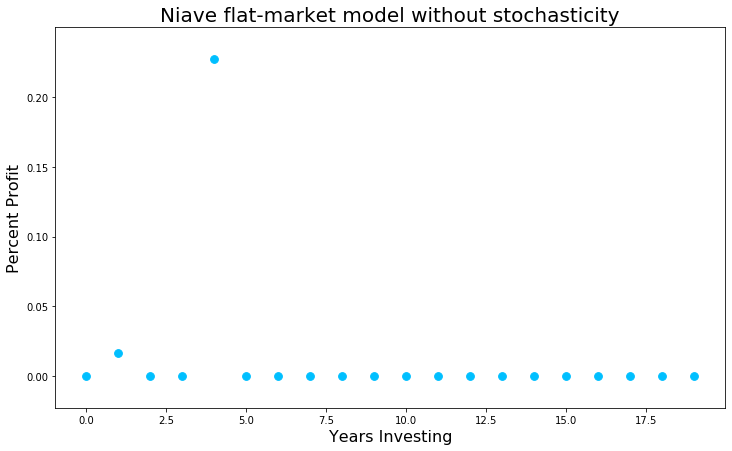

In [98]:
plt.figure(figsize=(12, 7))

plt.title("Niave flat-market model without stochasticity",fontsize=20)
plt.ylabel('Percent Profit',fontsize=16)
plt.xlabel("Years Investing",fontsize=16)
plt.scatter(years, profits, label='new good weather',c='deepskyblue',marker='o',s=60)
# plt.scatter(years, profits2, label='new good weather',c='black',marker='o',s=60)

In [99]:
df_clean_good['PercentChange'].sample(n=1,).values[0]

-0.2869613378693462

In [41]:
test = np.zeros(4, dtype=bool)
test

array([False, False, False, False])